In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from implementations import *
from model_helpers import *
from data_helpers import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
paths = { 
    'train' : 'data/train.csv',
     'test' : 'data/test.csv',
     'submission' : 'data/sample-submission.csv'
        }

y_tr, tx_tr, ids_tr = load_csv_data(paths['train'], sub_sample=False)
y_te, tx_te, ids_te = load_csv_data(paths['test'])

In [8]:
mask_tr = get_mask(tx_tr)
mask_te = get_mask(tx_te)

x_tr_subsamples = []
y_tr_subsamples = []

x_te_subsamples = []

for i in range(4):
    x_tr_subsamples.append(tx_tr[mask_tr[i]])
    y_tr_subsamples.append(y_tr[mask_tr[i]])
    x_te_subsamples.append(tx_te[mask_te[i]])

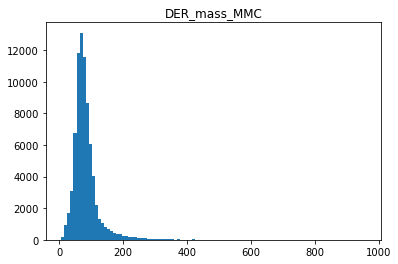

In [9]:
jet_num=1
col=2
data_jet=x_tr_subsamples[jet_num]  # select the desired jet number
col_with=data_jet[:,col]  # select the col number
plt.hist(col_with, bins=100);  # hist with outliers
plt.title("DER_mass_MMC")
plt.savefig("HeavyTail_before_log.png")

In [10]:
def delete_outliers_from_col(tx,col, a=0.05):
    """
    Delete the tails of tx given the quantile a (a=5% by default)
    """
    tx[:, col][tx[:, col] < np.quantile(tx[:, col], a)] = np.quantile(tx[:, col], a)
    tx[:, col][tx[:, col] > np.quantile(tx[:, col], 1 - a)] = np.quantile(tx[:, col], 1 - a)

    return tx[:,col]



def heavy_tail(x, col):

    x[:, col] = np.log1p(x[:, col])

    return x[:,col]

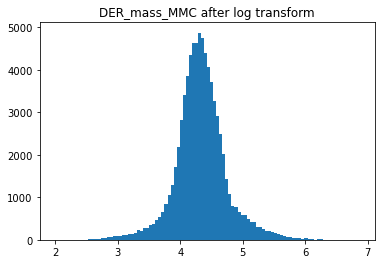

In [11]:
# log transform
log_col=heavy_tail(data_jet,col)
plt.hist(log_col, bins=100);
plt.title("DER_mass_MMC after log transform")
plt.savefig("HeavyTail_after_log.png")